Name : SILVA G.B.N.M. <br>
Index No : 190592X

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

Q1

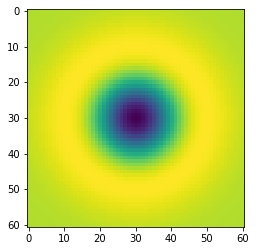

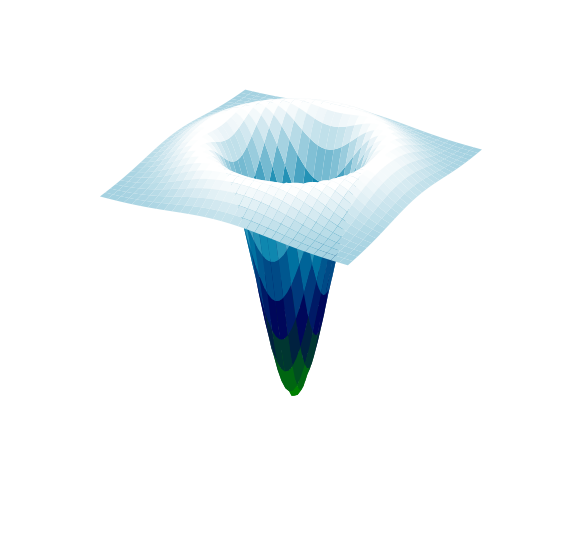

In [4]:
sigma = 10
hw = 3*sigma
X,Y = np.meshgrid(np.arange(-hw,hw+1,1),np.arange(-hw,hw+1,1))
log = 1/(2*np.pi*sigma**2)*(X**2/(sigma**2)+Y**2/(sigma**2)-2)*np.exp(-(X**2+Y**2)/(2*sigma**2))
plt.imshow(log)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection = '3d')

surf = ax.plot_surface(X,Y,log,cmap = cm.ocean, linewidth = 0 , antialiased = True)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

plt.axis('off')
plt.show()

Q2

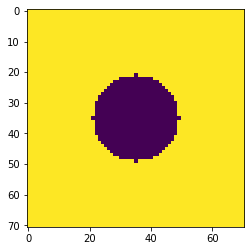

In [5]:
w,h = 71, 71
hw, hh = w//2 , h//2
f = np.ones((h,w),dtype=np.float32)*255
X,Y = np.meshgrid(np.arange(-hh,hh+1,1),np.arange(-hw,hw+1,1))
r = w//5
f +=  X**2+ Y**2>r**2
plt.imshow(f)

(35, 35, 4)
9


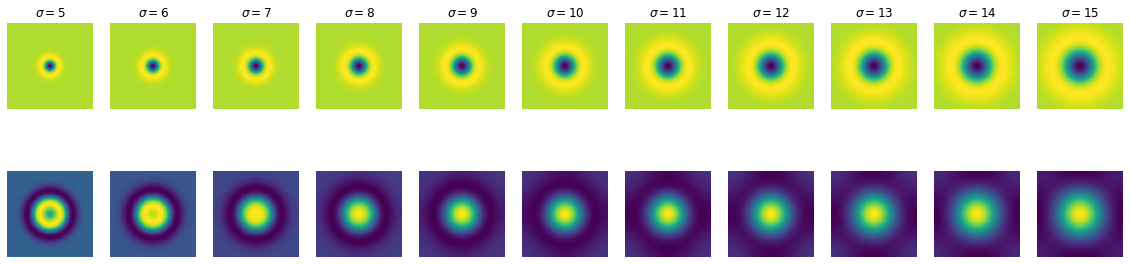

In [10]:
s = 11
fig,ax = plt.subplots(2,s,figsize=(20,5))
scale_space = np.empty((h,w,s),dtype=np.float32)
sigmas = np.arange(5,16,1)
for i ,sigma in enumerate(np.arange(5,16,1)):
    log_hw = 3*np.max(sigmas)
    X,Y = np.meshgrid(np.arange(-log_hw,log_hw+1,1),np.arange(-log_hw,log_hw+1,1))
    log = 1/(2*np.pi*sigma**2)*(X**2/(sigma**2)+Y**2/(sigma**2)-2)*np.exp(-(X**2+Y**2)/(2*sigma**2))
    f_log = cv.filter2D(f,-1,log)
    scale_space[:,:,i] = f_log
    ax[0,i].imshow(log)
    ax[0,i].axis('off')
    ax[0,i].set_title(r'$\sigma = {}$'.format(sigma))
    ax[1,i].imshow(f_log)
    ax[1,i].axis('off')

indices = np.unravel_index(np.argmax(scale_space,axis=None),scale_space.shape)
print(indices)
print(sigmas[indices[2]])